In [1]:
train_file_path= "/Users/vikaslakka/Desktop/FSDS/Machine_learning/Projects/sample_project_12_jul/FSDS_sample_project_23_jul/housing/artifact/data_ingestion/22-08-11-17-36-45/ingested_data/train/housing.csv"


In [2]:
import pandas as pd
import numpy as np

In [3]:
df= pd.read_csv(train_file_path)

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [5]:
df.shape

(16512, 10)

In [6]:
x, y= df.drop(columns='median_house_value', axis=1),df['median_house_value']

In [7]:
x.shape, y.shape

((16512, 9), (16512,))

In [8]:
x.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [9]:
## we will use imputer to fill null values
from sklearn.impute import SimpleImputer

In [10]:
numerical_columns= x.drop(columns='ocean_proximity', axis=1)

In [11]:
simple_imputer= SimpleImputer(strategy='median')
simple_imputer.fit_transform(numerical_columns)

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [12]:
x_imputed_data= simple_imputer.transform(numerical_columns)

In [13]:
simple_imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [14]:
simple_imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [15]:
### For categorical column, we will use most freuquent one.
cat_simple_imputer= SimpleImputer(strategy='most_frequent')

In [16]:
ocean_prox_impute= cat_simple_imputer.fit_transform(np.array(x.ocean_proximity).reshape(-1,1))

In [17]:
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [18]:
np.array(x.ocean_proximity).reshape(-1,1).shape

(16512, 1)

In [19]:
from sklearn.base import BaseEstimator, TransformerMixin

In [20]:
COLUMN_TOTAL_ROOMS= "total_room"
COLUMN_POPULATION="population"
COLUMN_HOUSEHOLDS="households"
COLUMN_TOTAL_BEDROOM="total_bedrooms"

class FeatureGenerator(BaseEstimator, TransformerMixin):

    def __init__(self, add_bedrooms_per_room=True,
                 total_rooms_ix=3,
                 population_ix=5,
                 households_ix=6,
                 total_bedrooms_ix=4, columns=None):
        """
        FeatureGenerator Initialization
        add_bedrooms_per_room: bool
        total_rooms_ix: int index number of total rooms columns
        population_ix: int index number of total population columns
        households_ix: int index number of  households columns
        total_bedrooms_ix: int index number of bedrooms columns
        """
        try:
            self.columns = columns
            if self.columns is not None:
                total_rooms_ix = self.columns.index(COLUMN_TOTAL_ROOMS)
                population_ix = self.columns.index(COLUMN_POPULATION)
                households_ix = self.columns.index(COLUMN_HOUSEHOLDS)
                total_bedrooms_ix = self.columns.index(COLUMN_TOTAL_BEDROOM)

            self.add_bedrooms_per_room = add_bedrooms_per_room
            self.total_rooms_ix = total_rooms_ix
            self.population_ix = population_ix
            self.households_ix = households_ix
            self.total_bedrooms_ix = total_bedrooms_ix
        except Exception as e:
            raise HousingException(e, sys) from e

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        try:
            room_per_household = X[:, self.total_rooms_ix] / \
                                 X[:, self.households_ix]
            population_per_household = X[:, self.population_ix] / \
                                       X[:, self.households_ix]
            if self.add_bedrooms_per_room:
                bedrooms_per_room = X[:, self.total_bedrooms_ix] / \
                                    X[:, self.total_rooms_ix]
                generated_feature = np.c_[
                    X, room_per_household, population_per_household, bedrooms_per_room]
            else:
                generated_feature = np.c_[
                    X, room_per_household, population_per_household]

            return generated_feature
        except Exception as e:
            raise HousingException(e, sys) from e



In [21]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [22]:
num_pipeline= Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('feature_generator', FeatureGenerator()),
        ('scaling', StandardScaler(with_mean=False))
])

In [23]:
cat_pipeline= Pipeline(steps=[        
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('oneHotEncoder',OneHotEncoder() ),
        ('scaling', StandardScaler(with_mean=False))

])

In [24]:
num_columns=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']
cat_columns=['ocean_proximity']

In [25]:
preprocessing= ColumnTransformer(
[('numerical_pipeline',num_pipeline, num_columns),
('cat_pipeline', cat_pipeline, cat_columns)]

)

In [26]:
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [27]:
preprocessing.fit_transform(x)

array([[-60.67637885,  18.01769717,   2.30626612, ...,   0.        ,
          0.        ,   0.        ],
       [-58.56324628,  15.4778193 ,   0.55668493, ...,   0.        ,
          0.        ,   2.9869105 ],
       [-59.46744721,  16.54428736,   3.4991624 , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-61.3058226 ,  17.98027724,   3.81726807, ...,   0.        ,
          0.        ,   0.        ],
       [-61.29583143,  17.91946985,   1.11336985, ...,   0.        ,
          0.        ,   0.        ],
       [-61.01607865,  18.69593344,   2.14721329, ...,   0.        ,
          0.        ,   0.        ]])

### Lets do the same with test data

In [28]:
test_file_path= "/Users/vikaslakka/Desktop/FSDS/Machine_learning/Projects/sample_project_12_jul/FSDS_sample_project_23_jul/housing/artifact/data_ingestion/22-08-11-17-36-45/ingested_data/test/housing.csv"


In [29]:
test_df= pd.read_csv(test_file_path)

In [30]:
test_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
1,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN
2,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN
3,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN
4,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN


In [31]:
preprocessing.fit_transform(test_df)

array([[-58.89591099,  16.03661399,   2.29643557, ...,   0.        ,
          0.        ,   0.        ],
       [-59.9057826 ,  16.39851882,   1.90049841, ...,   0.        ,
          0.        ,   0.        ],
       [-58.92575942,  16.0977148 ,   2.85074761, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-59.55755101,  16.187016  ,   3.40505964, ...,   0.        ,
          0.        ,   0.        ],
       [-58.65712362,  15.80631092,   2.37562301, ...,   0.        ,
          0.        ,   0.        ],
       [-58.98048152,  16.06951443,   2.85074761, ...,   0.        ,
          0.        ,   0.        ]])

### Dump the preprocessing steps

In [32]:
import dill

In [33]:
with open("preprocessing.pkl", 'wb') as prep_file:

    dill.dump(preprocessing, prep_file)

In [34]:
### Load pickle file and transform
with open("preprocessing.pkl", "rb") as prep_load_file:
    preprocessing_loaded_obj= dill.load(prep_load_file)

In [35]:
preprocessing_loaded_obj.transform(test_df)

array([[-58.89591099,  16.03661399,   2.29643557, ...,   0.        ,
          0.        ,   0.        ],
       [-59.9057826 ,  16.39851882,   1.90049841, ...,   0.        ,
          0.        ,   0.        ],
       [-58.92575942,  16.0977148 ,   2.85074761, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-59.55755101,  16.187016  ,   3.40505964, ...,   0.        ,
          0.        ,   0.        ],
       [-58.65712362,  15.80631092,   2.37562301, ...,   0.        ,
          0.        ,   0.        ],
       [-58.98048152,  16.06951443,   2.85074761, ...,   0.        ,
          0.        ,   0.        ]])

In [36]:
## Save the output and train the model for testing purpose
train_df= preprocessing_loaded_obj.transform(x)

In [37]:
from sklearn.linear_model import LinearRegression

In [39]:
lr= LinearRegression()
lr.fit(train_df, y)

LinearRegression()

In [41]:
lr.fit_intercept

True

In [42]:
lr.coef_

array([-5.58833101e+04, -5.64500196e+04,  1.37920744e+04, -2.43735165e+03,
        8.41676190e+03, -4.90224362e+04,  4.92613046e+04,  7.36266931e+04,
        4.59113276e+03,  1.42926902e+02,  8.90482521e+03, -2.20434977e+14,
       -2.05320691e+14, -1.19397757e+13, -1.37133693e+14, -1.48690502e+14])

In [43]:
lr.intercept_

443060720355170.9

In [44]:
y

0         72100.0
1        279600.0
2         82700.0
3        112500.0
4        238300.0
           ...   
16507    268500.0
16508     90400.0
16509    140400.0
16510    258100.0
16511     62700.0
Name: median_house_value, Length: 16512, dtype: float64

In [46]:
y_hat=lr.predict(train_df)

In [49]:
from matplotlib import pyplot as plt

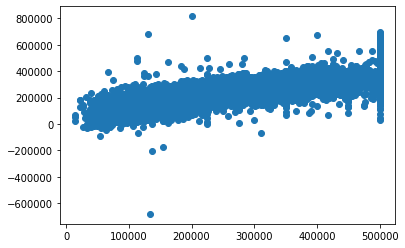

In [50]:
plt.plot(y, y_hat, "o")

In [51]:
from sklearn.metrics import r2_score

In [52]:
r2_score(y, y_hat)

0.6480551759158626

In [54]:
test_prep_df= preprocessing_loaded_obj.transform(test_df)

In [55]:
y_hat_test= lr.predict(test_prep_df)

In [57]:
y_test= np.array(test_df.median_house_value)

In [59]:
r2_score(y_test, y_hat_test)

0.6563895417134974